In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd

df = pd.read_csv("C:/Users/Rahul Gaikwad/Desktop/Spotify pro/SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [39]:
df.info()
df.describe()
df.drop_duplicates(inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [45]:
if 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms']/60000
if 'release_date' in df.columns:
    df['release_year'] = pd.to_datetime(df['release_date']).dt.year

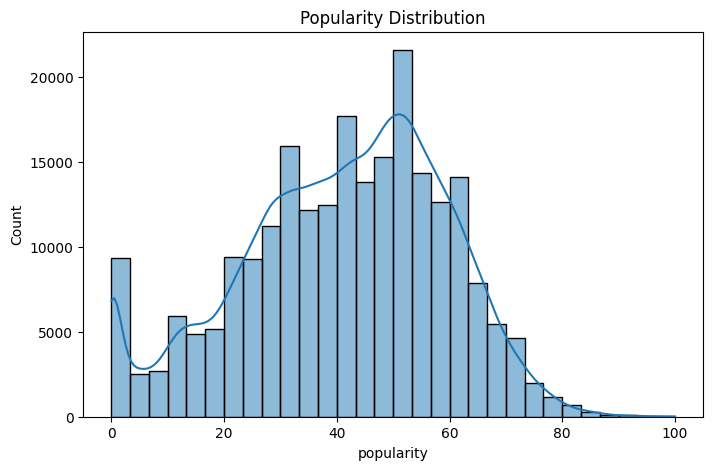

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Popularity Distribution')
plt.show()

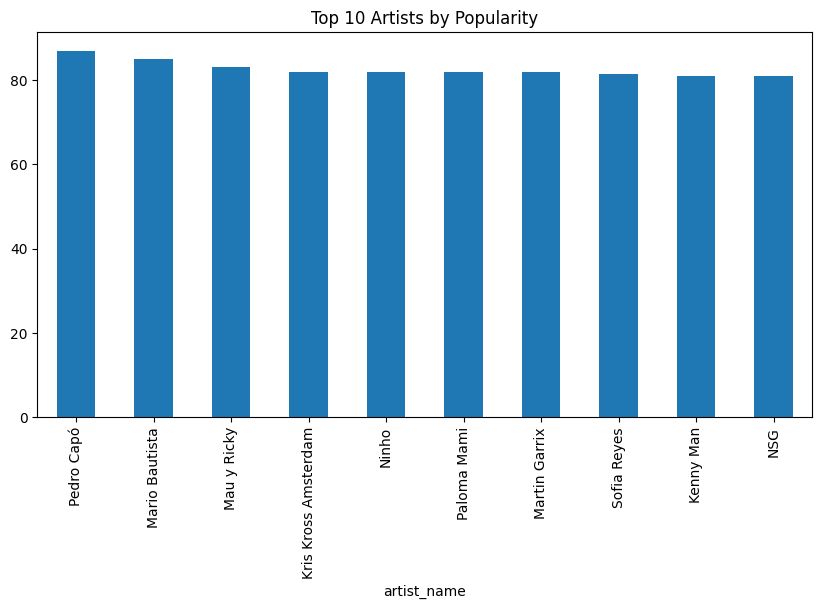

In [51]:
top_artists = df.groupby('artist_name').mean(numeric_only=True).sort_values('popularity',ascending=False).head(10)
plt.figure(figsize=(10,5))
top_artists['popularity'].plot(kind='bar')
plt.title('Top 10 Artists by Popularity')
plt.show()

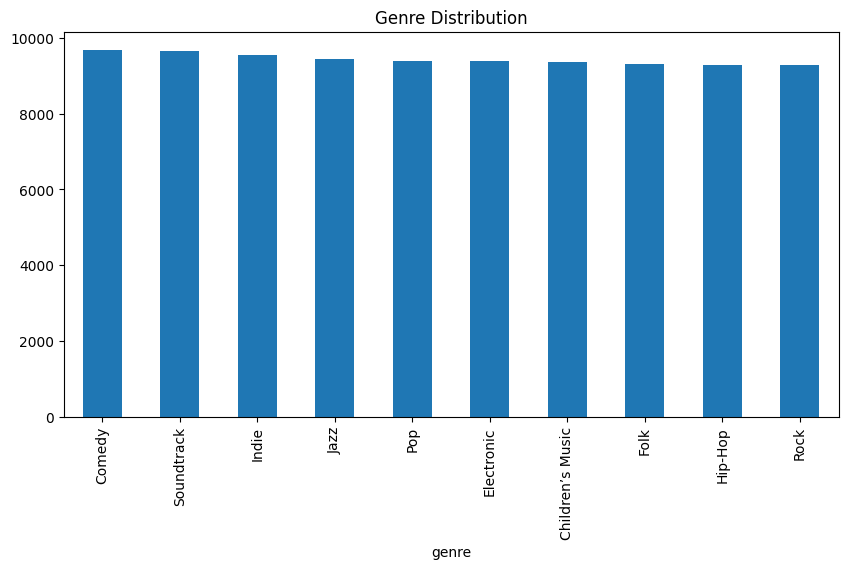

In [50]:
if 'genre' in df.columns:
    df['genre'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
    plt.title('Genre Distribution')
    plt.show()

In [56]:
if 'release_year' in df.columns:
    df.groupby('release_year').size().plot(kind='line', figsize=(10,5))
    plt.title('Tracks Released Over Years')
    plt.show()

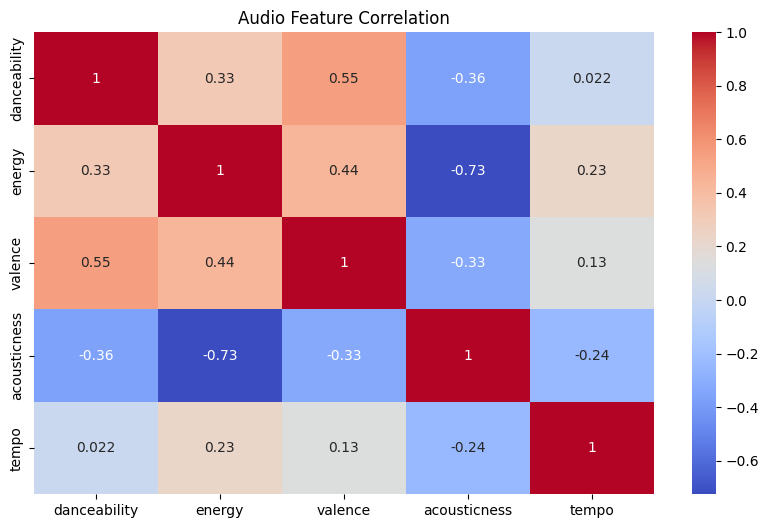

In [53]:
features = ['danceability','energy','valence','acousticness','tempo']
existing = [c for c in features if c in df.columns]
plt.figure(figsize=(10,6))
sns.heatmap(df[existing].corr(), annot=True, cmap='coolwarm')
plt.title('Audio Feature Correlation')
plt.show()

In [54]:
from IPython.display import Markdown, display
display(Markdown("""
### Key Insights
- Energetic & danceable tracks gain higher popularity
- Pop & Hip-Hop lead genres
- Release trend increases in recent years
- Audio features show moderate correlations
"""))


### Key Insights
- Energetic & danceable tracks gain higher popularity
- Pop & Hip-Hop lead genres
- Release trend increases in recent years
- Audio features show moderate correlations


In [55]:
display(Markdown("""
### Conclusion
Modern Spotify trends favor energetic, dance-oriented music with shorter durations and consistent popularity for top artists.
"""))


### Conclusion
Modern Spotify trends favor energetic, dance-oriented music with shorter durations and consistent popularity for top artists.
